<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/AugustLeetCodePart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

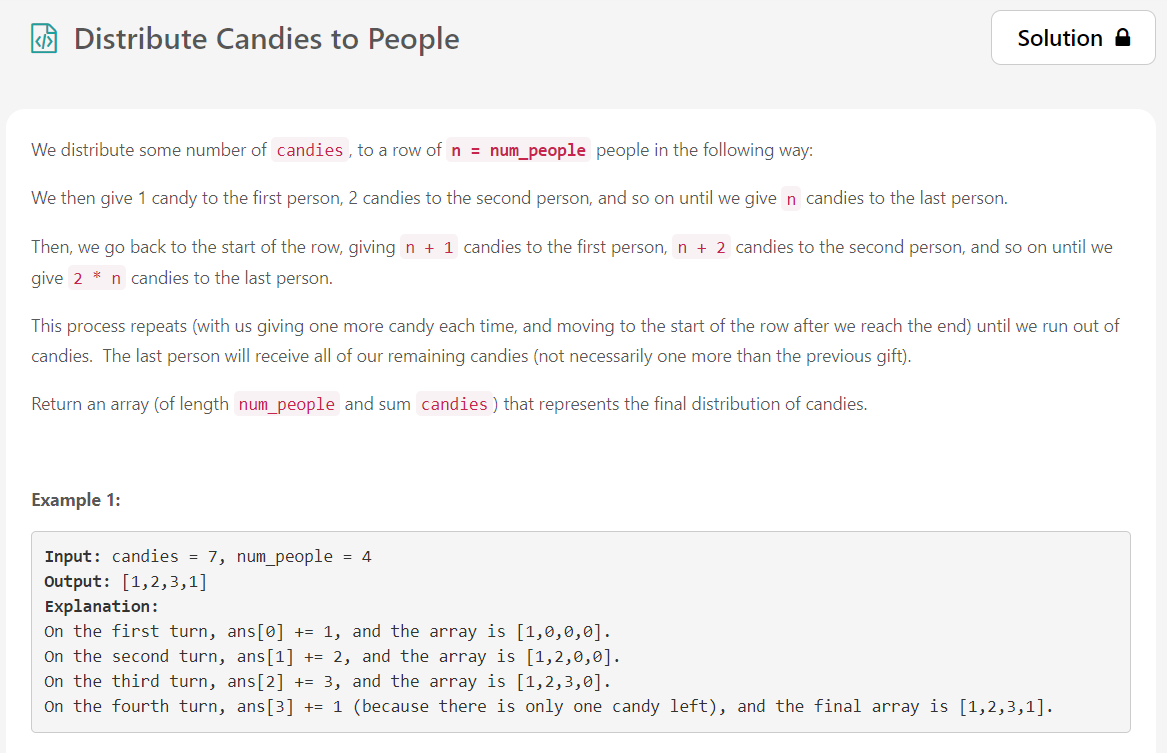

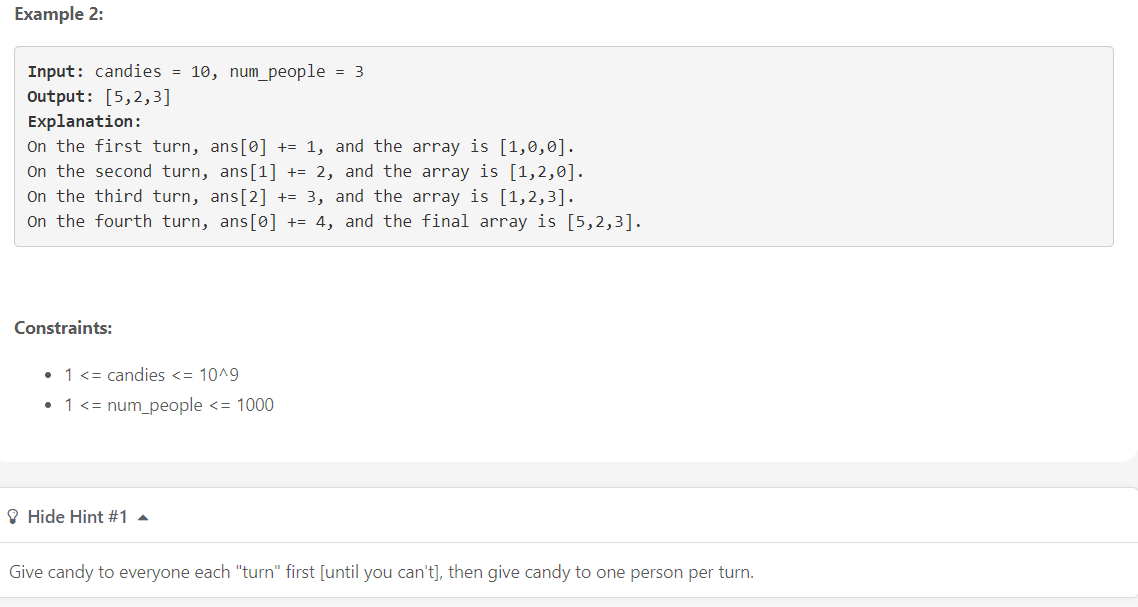

In [ ]:
# My solution :
class Solution:
    def distributeCandies(self, candies: int, num_people: int) -> List[int]:
        ret = [0 for x in range(num_people)]
        i, give = 0, 1
        while candies:           
            if candies >= give:
                ret[i] += give
                candies -= give
                give += 1
            else:
                ret[i] += candies
                candies, give = 0,0
            
            i += 1
            if i >= num_people:
                i = 0
            
        return ret




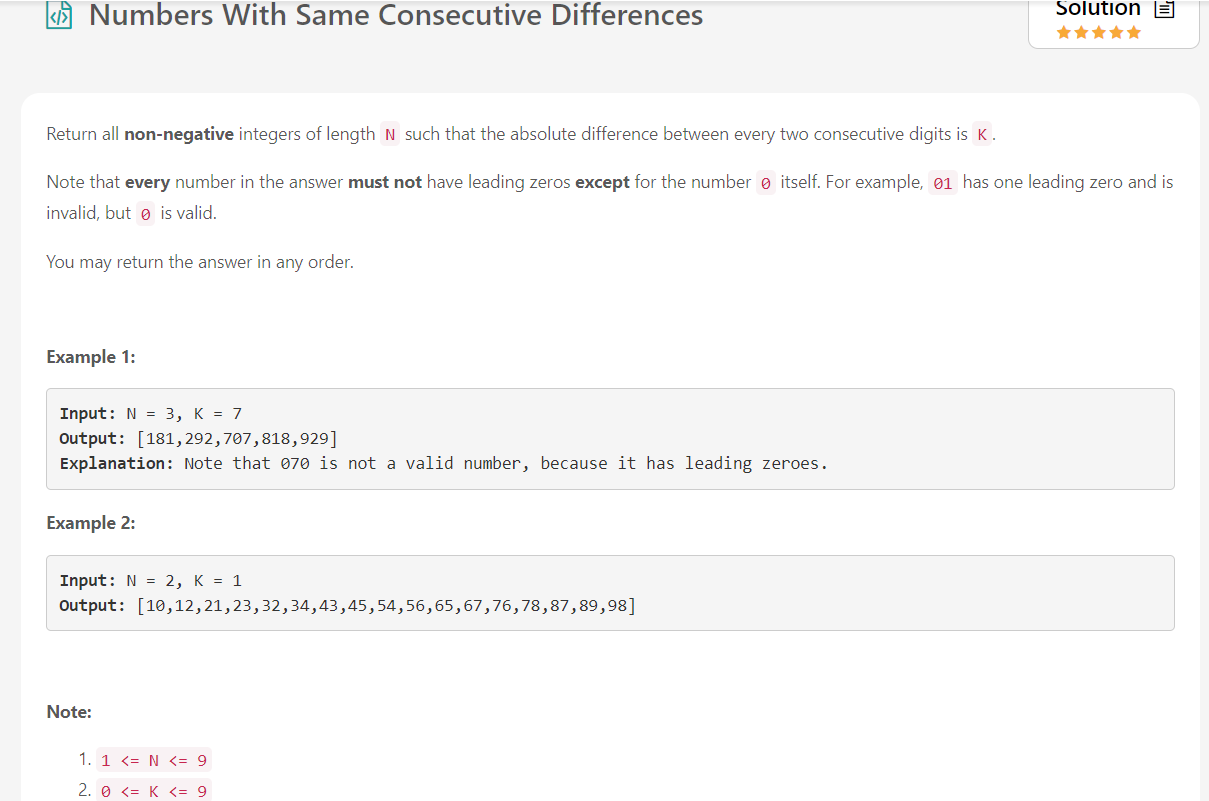

In [ ]:
# phone solution 

class Solution:
    def numsSameConsecDiff(self, N: int, K: int) -> List[int]:
        ret = [1,2,3,4,5,6,7,8,9]
        
        for _ in range(N-1):
            temp = []
            
            for num in ret:
                last_digit = num % 10
                if last_digit - K >= 0:
                    temp.append(num * 10 + last_digit - K)
                if K != 0 and last_digit + K <10:
                    temp.append( num * 10 + last_digit + K)
                
            ret = temp
            
        if N == 1:
            ret.append(0)
            
        return ret
                

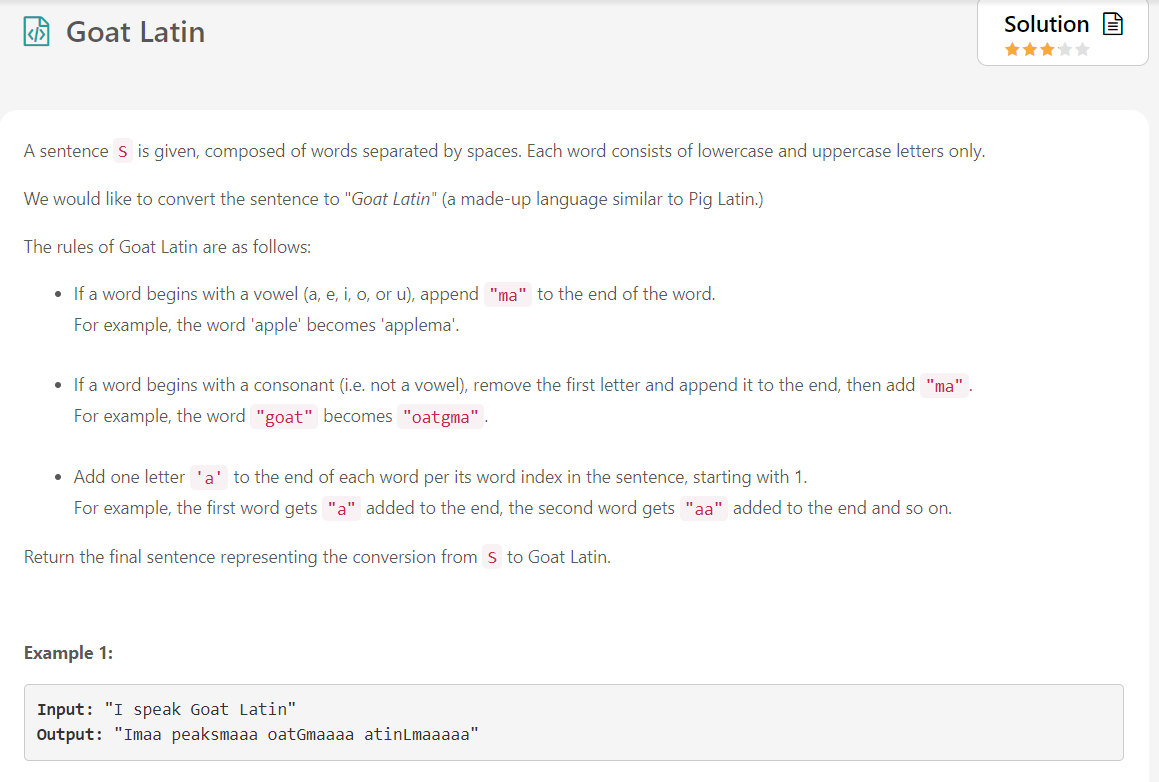

In [ ]:
'''August 19th Goat Latin 

Example 2:

Input: "The quick brown fox jumped over the lazy dog"
Output: "heTmaa uickqmaaa rownbmaaaa oxfmaaaaa umpedjmaaaaaa overmaaaaaaa hetmaaaaaaaa azylmaaaaaaaaa ogdmaaaaaaaaaa"
 

Notes:
S contains only uppercase, lowercase and spaces. Exactly one space between each word.
1 <= S.length <= 150.

'''
# my solution 

class Solution:
    def toGoatLatin(self, S: str) -> str:
        mylist = S.split()
        for i in range(len(mylist)): 
            if mylist[i][0] in ['a','e','i','o','u','A','E','I','O','U']:
                mylist[i] = mylist[i] + 'ma'
            else:
                mylist[i] = mylist[i][1:] + mylist[i][0] + 'ma'
                
            mylist[i] = mylist[i] + 'a' * (i+1)
        
        return ' '.join(word for word in mylist)




# fastest submssion 
class Solution:
    def toGoatLatin(self, S: str) -> str:
         
        W = S.split(" ")
        out = ''
        
        for i, s in enumerate(W):
            
            if s[0].lower()  in ['a', 'e', 'i', 'o', 'u']:
                s = s + "ma"
            else:
                s = s[1:] + s[0]
                s = s + "ma"
                
            while(i>=0):
                s = s + 'a'
                i = i-1
                
            out = out + s + " "
            
        print(W)   
        return out[0:len(out)-1]


""" second fastest """
class Solution:
    def toGoatLatin(self, S: str) -> str:
        S+=" "
        vowels=set(list("aeiouAEIOU"))
        words=[""]
        for char in S:
            if char == " ":
                if words[-1][0] not in vowels:
                    words[-1]= words[-1][1:]+ words[-1][0]
                words[-1]+= "ma"+ ("a" *len(words))
                words.append("")
            else:
                words[-1]+= char
        return " ".join(words)[:-1]
        

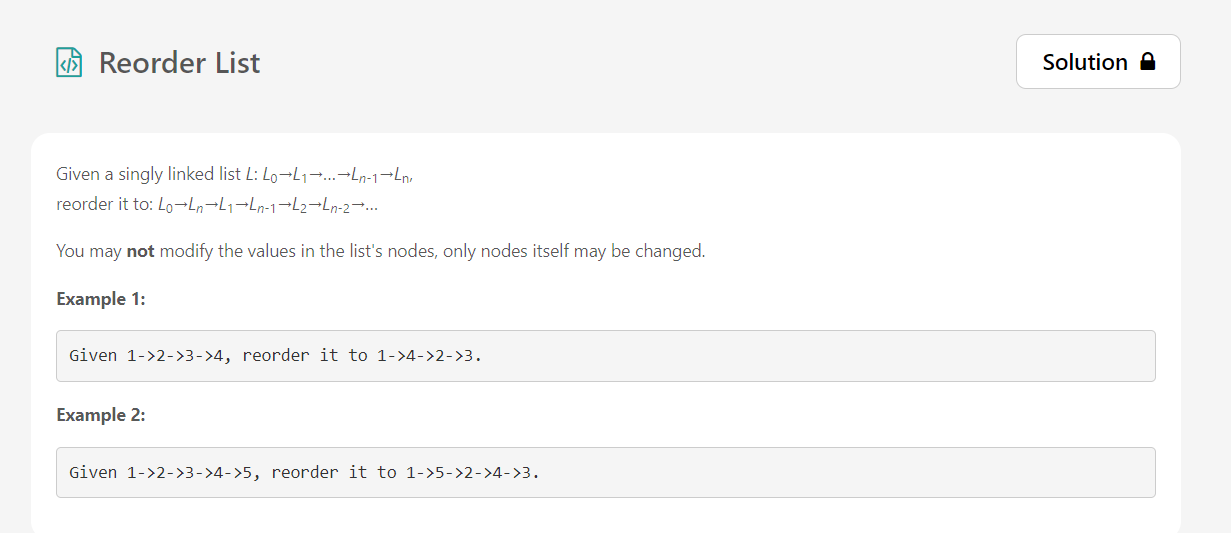

In [ ]:
'''August 20th Reorder List '''
# Find the mid point, reverse list after mid point, then interleave the 2 sides.
# Time - O(n)
# Space - O(1)

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

# Solution 1: Note to understand solution using stack 
# Time O(n)
# Space O(n)
class Solution:
    def reorderList(self, head: ListNode) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        stack = [] 
        curr = ListNode()
        curr = head
        # save all the list to the stack 
        while curr:
            stack.append(curr)
            curr = curr.next 
        
        # print(stack)
        # print(stack.pop()) # last node
        cur = head 
        size = len(stack)
        
        if size <= 2: # dont need to change anything 
            return 
        
        nextt = ListNode() # an empty node 
        for i in range(size//2):
            nextt = cur.next #put 2 to nextt
            cur.next = stack.pop() # pop 4 to link to 1, curr.next = 4 
            cur = cur.next  # set cur to be 4 
            cur.next = nextt # set next of 4 to be 2. 
            cur = cur.next # set cur to be 2. 
            # after the 1st loop, we ll have 1->4->2->3
            
        # finally set last node.next to None
        cur.next = None

# Solution 2

class Solution:
    def reorderList(self, head: ListNode) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        # check empty
        ì not head or not head.next:
            return 
    
        # reversing, slow advance by 1, fast advance by 2 
        slow, fast = head, head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            
        # so now, slow is in the middle of the list, fast is at the end of the list 
        
        
        
    
    

# using 2 pointers. 
class Solution:
    def reorderList(self, head: ListNode) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        if not head:
            return None

        # set slow to mid for odd length lists, first of second half for even
        fast, slow = head, head
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next

        # reverse nodes after slow (slow has pointers from both sides)
        prev, node = None, slow
        while node:
            prev, node.next, node = node, prev, node.next

        first, second = head, prev # heads of the normal and reversed lists
        while second.next:
            first.next, first = second, first.next # insert second after first
            second.next, second = first, second.next # insert first after second


# fastest submission 

class Solution:
    def reverse_ll(self, head: ListNode) -> ListNode:
        prev = nex = None
        curr = head
        while curr:
            nex = curr.next # store the next term
            curr.next = prev # then switch next pointer to the previous term
            prev = curr # increment previous term to the current term
            curr = nex # increment current term to the stored old_next_term
        return prev # prev is at the new head
    def reorderList(self, head: ListNode) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        if not head:
            return
        
        prev = None
        slow = fast = l1 = head
        while fast and fast.next:
            prev = slow
            slow = slow.next
            fast = fast.next.next
        l2 = self.reverse_ll(slow)
        while l2.next:
            tmp = l1.next
            l1.next = l2
            l1 = tmp
            
            tmp = l2.next
            l2. next = l1
            l2 = tmp

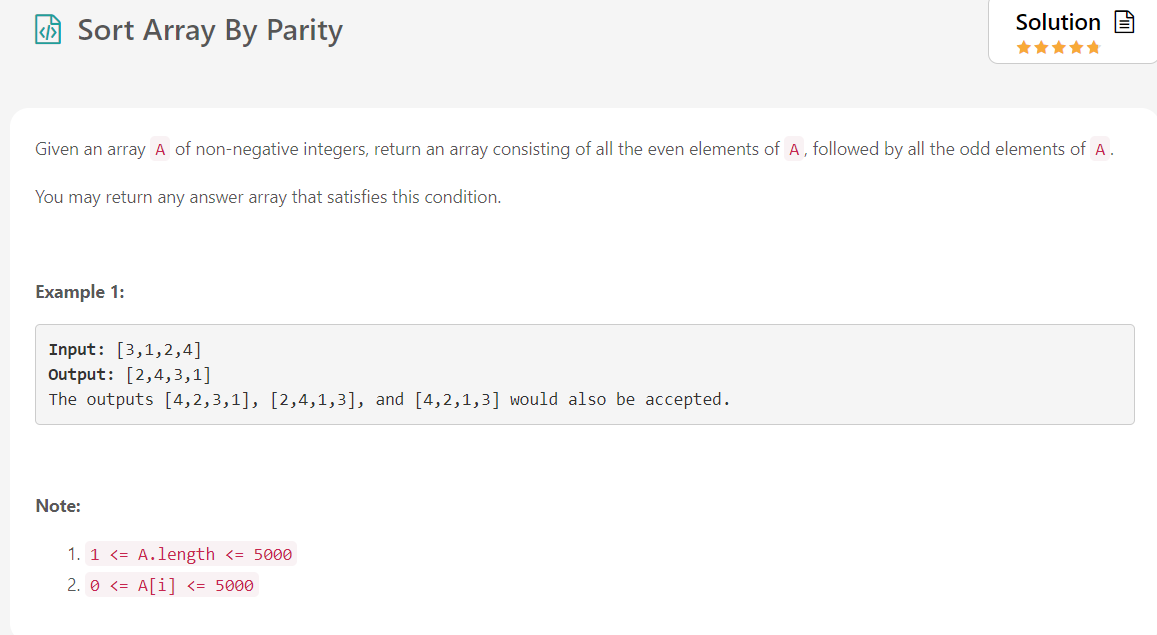

In [ ]:
''' August 21st Sort array by parity Leet code '''

# My submission 
class Solution:
    def sortArrayByParity(self, A: List[int]) -> List[int]:
        return [a for a in A if not a%2] +  [b for b in A if b%2]

# Other submissions
#1 using lambda

class Solution:
    def sortArrayByParity(self, A: List[int]) -> List[int]:
        A.sort(key = lambda x: x%2)
        return A

# 2 stacks
class Solution:
    def sortArrayByParity(self, A: List[int]) -> List[int]:
        even=[]
        odd=[]
        for i in range(len(A)):
            if A[i]%2==0:
                even.append(A[i])
            else:
                odd.append(A[i])
        result=even+odd
        return result

## very long time. 
class Solution:
    def sortArrayByParity(self, A: List[int]) -> List[int]:
        ret=[]

        for i in range(len(A)):
            if not A[i]%2:
                ret = [A[i]] + ret # this is very long, as well as insert method
            else:
                ret =  ret + [A[i]]

        return ret

### 2 pointer 

class Solution:
    def sortArrayByParity(self, A: List[int]) -> List[int]:
        i,j = 0, len(A) - 1
        
        while i<j:
            if A[i] % 2 == 1 and A[j] % 2 == 0:
                A[i], A[j] = A[j], A[i]
            
            if not A[i] % 2: i +=1
            if A[j] % 2: j -= 1
        
        return A

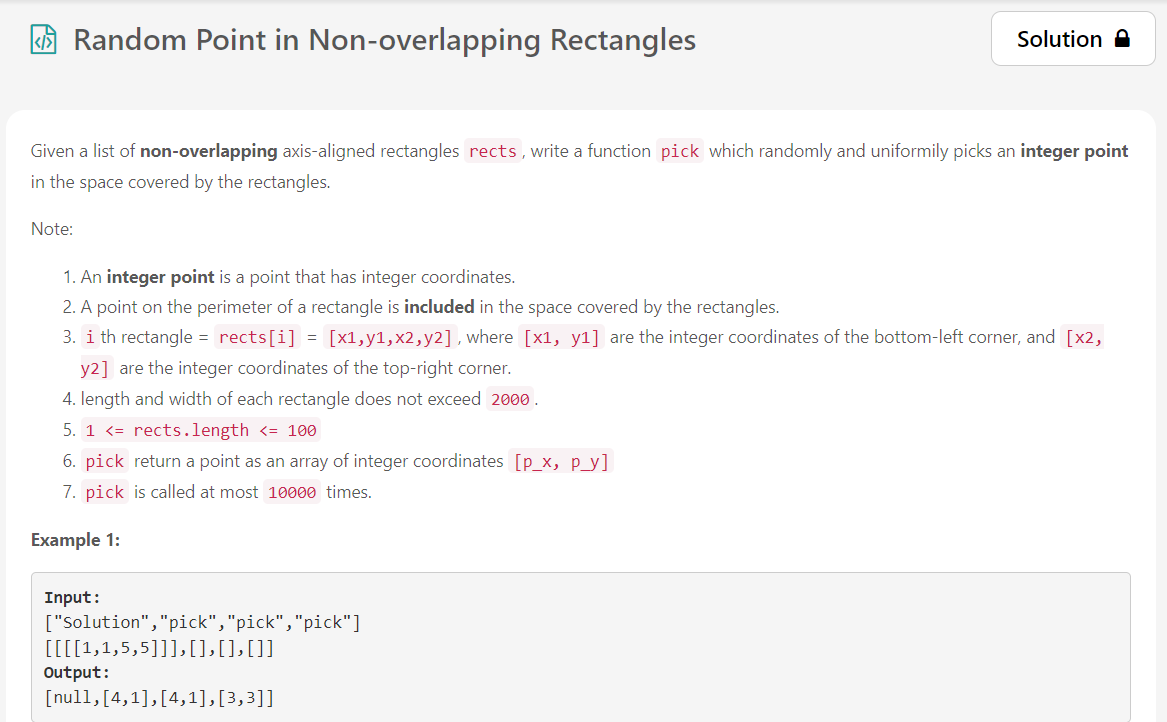

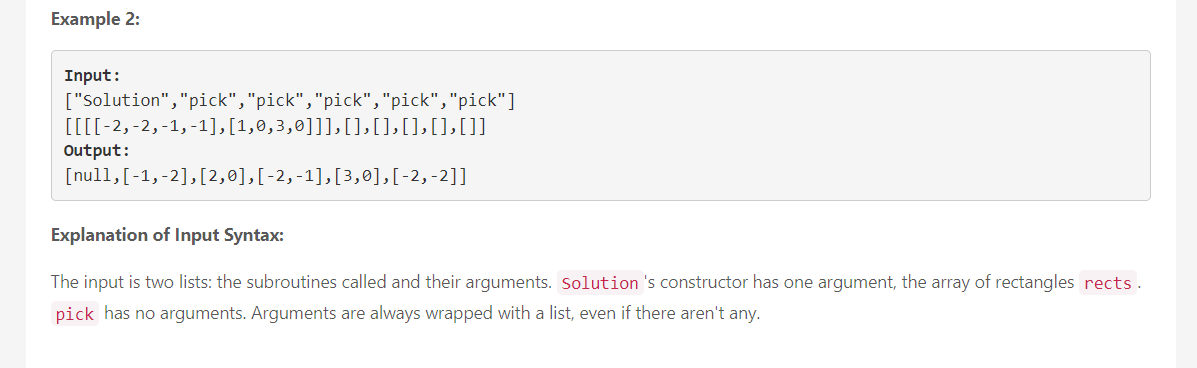

In [ ]:
'''August 22nd Random Point in Non-overlapping Rectangles '''
# Phone solution 

class Solution:

    def __init__(self, rects: List[List[int]]):
        self.area = [0]
        self.x_dims = [0]
        self.rects = rects
        
        for x1,y1,x2,y2 in rects:
            x_dim, y_dim = x2 -x1 + 1, y2- y1 + 1
            self.x_dims.append(x_dim)
            self.area.append(self.area[-1] + x_dim * y_dim)
        
    def pick(self) -> List[int]:
        import bisect, random
        n = random.randint(1,self.area[-1])
        i = bisect.bisect_left(self.area,n)
        n -= (self.area[i-1] + 1)
        
        d_y, d_x = divmod(n, self.x_dims[i])
        x,y = self.rects[i-1][:2]
        return [x + d_x, y + d_y]
        


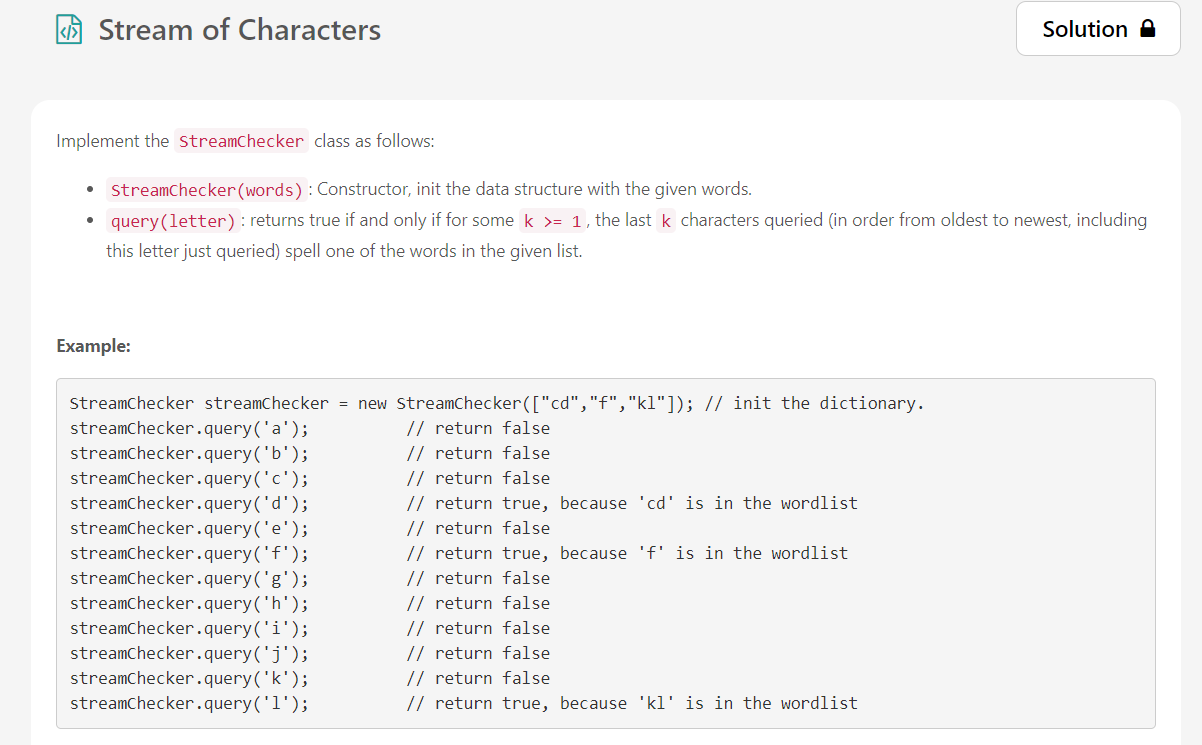


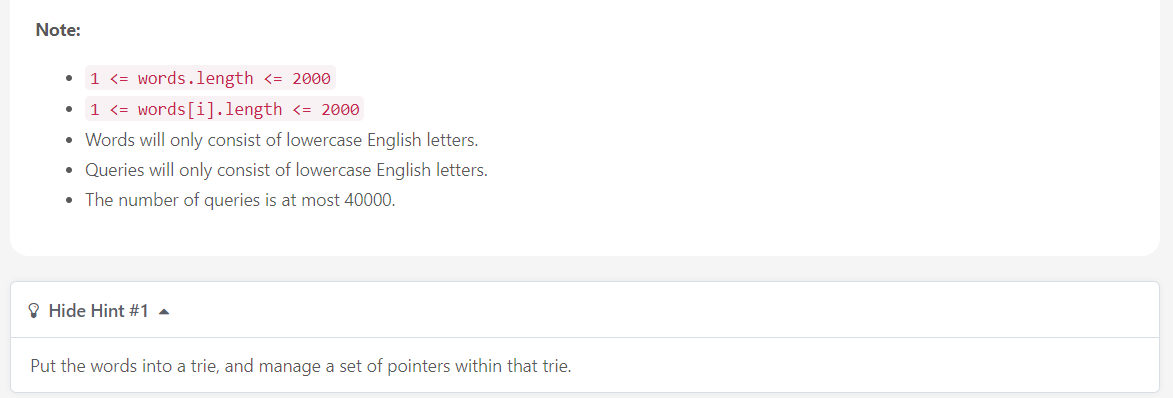

In [ ]:
''' August 23rd  Stream of Characters

Implement the StreamChecker class as follows:

StreamChecker(words): Constructor, init the data structure with the given words.
query(letter): returns true if and only if for some k >= 1, the last k characters queried 
(in order from oldest to newest, including this letter just queried) spell one of the words in the given list.
 

Example:
StreamChecker streamChecker = new StreamChecker(["cd","f","kl"]); // init the dictionary.
streamChecker.query('a');          // return false
streamChecker.query('b');          // return false
streamChecker.query('c');          // return false
streamChecker.query('d');          // return true, because 'cd' is in the wordlist
streamChecker.query('e');          // return false
streamChecker.query('f');          // return true, because 'f' is in the wordlist
streamChecker.query('g');          // return false
streamChecker.query('h');          // return false
streamChecker.query('i');          // return false
streamChecker.query('j');          // return false
streamChecker.query('k');          // return false
streamChecker.query('l');          // return true, because 'kl' is in the wordlist'''

# my solution, time limit exceeded
class StreamChecker:

    def __init__(self, words: List[str]):
        self.words = words
        self.maxsize = max(len(x) for x in self.words)
        self.mystr = ''


    def query(self, letter: str) -> bool:
        if len(self.mystr) < self.maxsize:
            self.mystr += letter
        else:
            self.mystr = self.mystr[1:] + letter
        
        # print('/n', self.mystr)
        
        for i in range(1,len(self.mystr)+1):
            # print(self.mystr[-i:])
            if self.mystr[-i:] in self.words:
                return True
        return False

# PHone solution, using Trie, need to note and understand about Trie
class StreamChecker:

    def __init__(self, words: List[str]):
        # need a Trie
        self.root = {}
        for w in words:
            node = self.root
            for c in reversed(w):
                if c not in node:
                    node[c] = {}
                node = node[c]
            node['%'] = True
        self.queries = []


    def query(self, letter: str) -> bool:
        self.queries.append(letter)
        node = self.root
        
        for c in reversed(self.queries):
            if c not in node:
                return False
            node = node[c]
            if '%' in node:
                return True 
        return False

In [ ]:
''' August 24th   Sum of Left Leaves

Find the sum of all left leaves in a given binary tree.

Example:

    3
   / \
  9  20
    /  \
   15   7

There are two left leaves in the binary tree, with values 9 and 15 respectively. Return 24.'''

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def sumOfLeftLeaves(self, root: TreeNode) -> int:
        
        if not root:
            return 0
        
        if root.left and not root.left.left and not root.left.right:
            return root.left.val + self.sumOfLeftLeaves(root.right)
        
        return self.sumOfLeftLeaves(root.left) + self.sumOfLeftLeaves(root.right)
            
                  

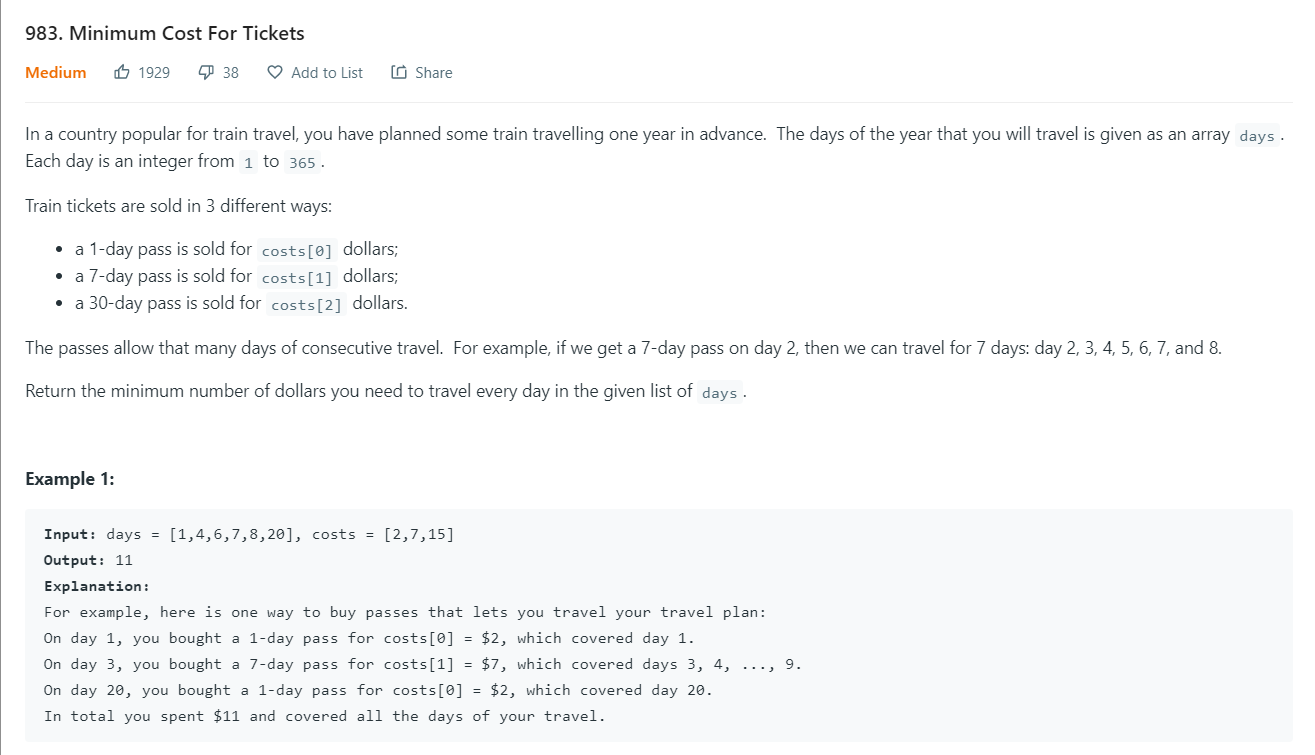

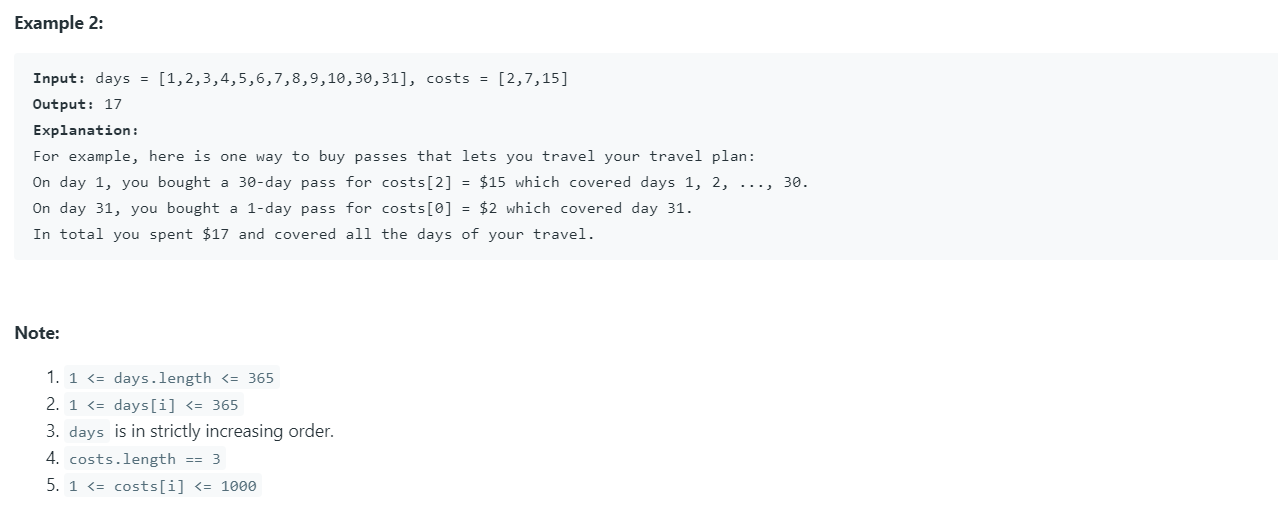

In [ ]:
''' Minimum Cost For Tickets '''
# time limit exceeded

class Solution:
    def mincostTickets(self, days: List[int], costs: List[int]) -> int:
        lengths = [1, 7, 30] # days covered 
        
        def FindMinCost(i):
            # find minimum cost from days[i]
            if i >= len(days):
                return 0
            
            # define initial Min
            MinCost = float("inf")
            tmp = i
            for length,cost in zip(lengths,costs):
                while tmp < len(days) and days[tmp] < days[i] + length:
                    tmp += 1
                MinCost = min(MinCost, cost + FindMinCost(tmp))
            
            return MinCost
        
        return FindMinCost(0)


# reference: https://www.codiwan.com/posts/leetcode/minimum-cost-for-tickets/

# Using Dynamic Programming 
class Solution:
    def mincostTickets(self, days: List[int], costs: List[int]) -> int:
        # dp[i] represent the min cost at index i
        dp = [0]*(days[-1]+1)
        for i in range(1, len(dp)):
            if i not in days:
                dp[i] = dp[i-1]
                continue

            dp[i] = min(dp[max(0,i-1)] + costs[0], dp[max(0,i-7)] + costs[1], dp[max(0,i-30)] + costs[2])

        return dp[-1]


In [ ]:
''' August 26th Fizz Buzz

Write a program that outputs the string representation of numbers from 1 to n.

But for multiples of three it should output “Fizz” instead of the number and for the multiples of five output “Buzz”. For numbers which are multiples of both three and five output “FizzBuzz”.

Example:

n = 15,

Return:
[
    "1",
    "2",
    "Fizz",
    "4",
    "Buzz",
    "Fizz",
    "7",
    "8",
    "Fizz",
    "Buzz",
    "11",
    "Fizz",
    "13",
    "14",
    "FizzBuzz"
]'''

class Solution:
    def fizzBuzz(self, n: int) -> List[str]:
        ret = []
        for i in range(1,n+1):
            if not i% 15:
                ret.append("FizzBuzz")
                continue
            elif not i % 3:
                ret.append("Fizz")
                continue
            elif not i%5:
                ret.append("Buzz")
                continue
            ret.append(str(i))
                
        return ret


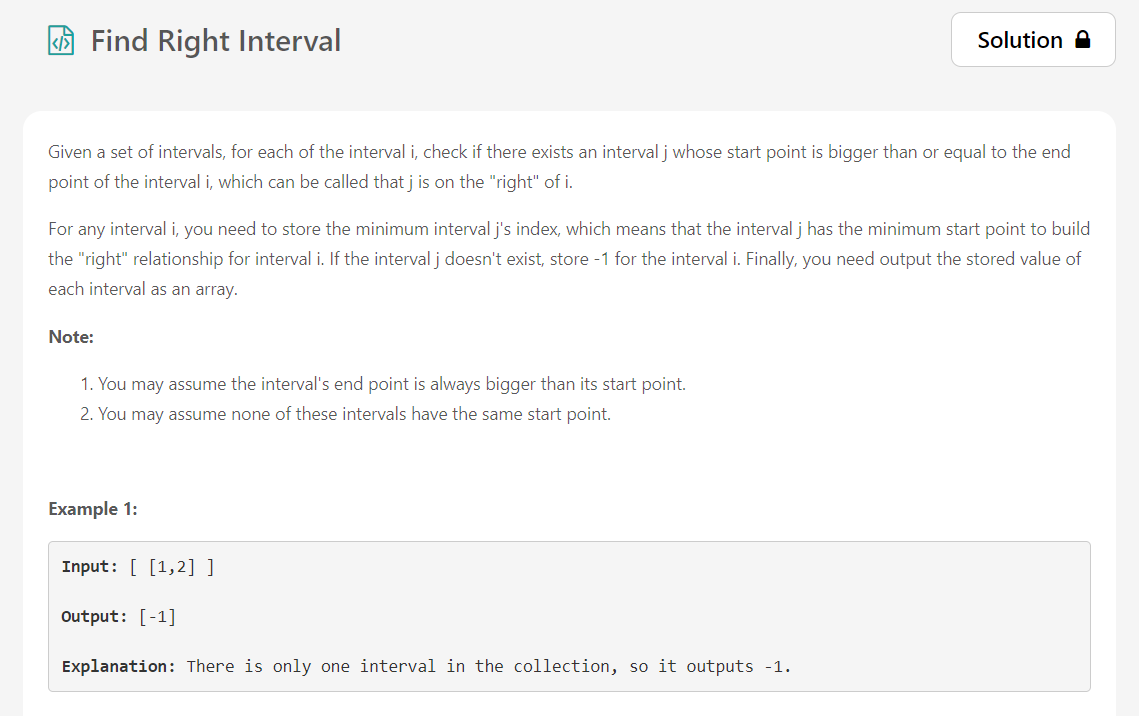

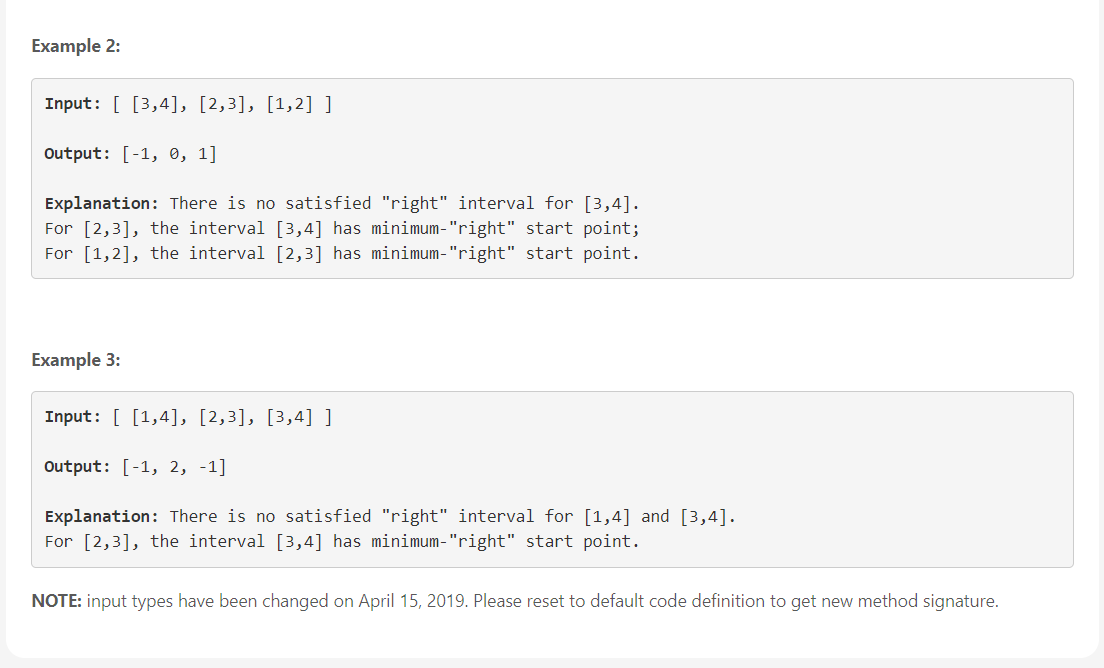

In [ ]:
class Solution:
    def findRightInterval(self, intervals: List[List[int]]) -> List[int]:
        new_intervals = [[intervals[i], i] for i in range(len(intervals))]
        new_intervals.sort(key = lambda x: x[0][0])   
        
        ret = [-1 for x in range(len(intervals))]
        
        for interval, i in new_intervals:
            l, r = 0, len(intervals)
            
            while l < r:
                m = (l+r)//2
                if new_intervals[m][0][0] < interval[1]:
                    l = m + 1
                else:
                    r = m
            if l == len(intervals):
                continue
            ret[i] = new_intervals[l][1]
        
        return ret 